In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, metrics

In [2]:
data_car = pd.read_csv('car_evaluation.csv',
                       names=['buying','maint','doors','persons','lug_boot','safety','class'])

In [4]:
data_car.tail()


,buying,maint,doors,persons,lug_boot,safety,class
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [4]:
class  : car category
buying : buying price
maint  : price of the maintenance
doors  : number of doors
persons: capacity in terms of persons to carry
lug_boot: the size of luggage boot
safety : estimated safety of the car

SyntaxError: invalid syntax (<ipython-input-4-364c7f0030e1>, line 1)

In [4]:
data_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
data_feature_names = ['buying','maint','doors','persons','lug_boot','safety']


In [6]:
data_class_names   = list(data_car['class'].unique())
data_class_names

['unacc', 'acc', 'vgood', 'good']

In [7]:
#Check missing values
data_car.isnull().sum()


buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [9]:
labels, uniques = pd.factorize(['b', 'd', 'd', 'c', 'a', 'c', 'a', 'b']) 
print("Numeric Representation : \n", labels) 
print("Unique Values : \n", uniques)

Numeric Representation : 
 [0 1 1 2 3 2 3 0]
Unique Values : 
 ['b' 'd' 'c' 'a']


In [8]:
#Identify the predictor variables and encode any string variables to equivalent integer codes
data_car['buying'],_   = pd.factorize(data_car['buying'])
data_car['maint'],_    = pd.factorize(data_car['maint'])
data_car['doors'],_    = pd.factorize(data_car['doors'])
data_car['persons'],_  = pd.factorize(data_car['persons'])
data_car['lug_boot'],_ = pd.factorize(data_car['lug_boot'])
data_car['safety'],_   = pd.factorize(data_car['safety'])

In [9]:
data_car.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,unacc
1,0,0,0,0,0,1,unacc
2,0,0,0,0,0,2,unacc
3,0,0,0,0,1,0,unacc
4,0,0,0,0,1,1,unacc


In [10]:
data_car.tail()

,buying,maint,doors,persons,lug_boot,safety,class
1723,3,3,3,2,1,1,good
1724,3,3,3,2,1,2,vgood
1725,3,3,3,2,2,0,unacc
1726,3,3,3,2,2,1,good
1727,3,3,3,2,2,2,vgood


In [11]:
#Select the predictor feature and the target variable
X = data_car.iloc[:,:-1]#all rows from 0 to -2 columns(-1 exclusive)
y = data_car.iloc[:,-1]

In [12]:
#Train 70% : 30% test
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)


In [13]:
#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dec_tree = tree.DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
# use the model to make predictions with the test data
y_pred = dec_tree.predict(X_test)

In [15]:
#visualize classification
pd.crosstab(y_pred, y_test)


class,acc,good,unacc,vgood
row_0,,,,
acc,105,1,1,1
good,4,24,0,0
unacc,6,0,362,0
vgood,0,0,0,15


In [16]:
#Model parameters study: how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 13
Accuracy: 0.97


In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Decision Tree Accuracy Score -> ",accuracy_score(y_pred,y_test)*100)
print("Confusion Matrix\n",confusion_matrix(y_pred,y_test))

Decision Tree Accuracy Score ->  97.495183044316
Confusion Matrix
 [[105   1   1   1]
 [  4  24   0   0]
 [  6   0 362   0]
 [  0   0   0  15]]


In [20]:
from sklearn.metrics import classification_report
target_names = ['0=unacc','1=acc','2=v-good','3=good']
print(classification_report(y_pred,y_test,target_names=target_names))


              precision    recall  f1-score   support

     0=unacc       0.91      0.96      0.94       109
       1=acc       0.92      0.82      0.87        28
    2=v-good       1.00      0.99      0.99       367
      3=good       0.94      1.00      0.97        15

    accuracy                           0.97       519
   macro avg       0.94      0.94      0.94       519
weighted avg       0.97      0.97      0.97       519



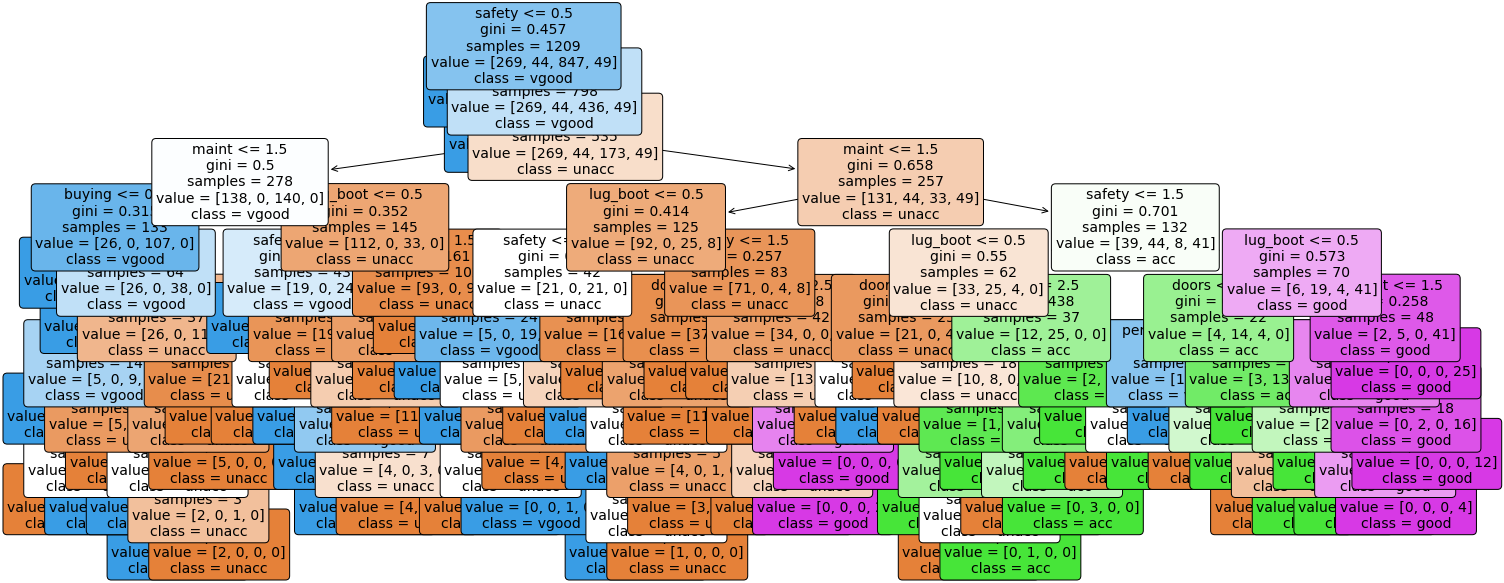

In [21]:
#Decision Tree Plotting
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
a = plot_tree(dec_tree, 
              feature_names=data_feature_names, 
              class_names=data_class_names, 
              filled=True, 
              rounded=True, 
              fontsize=14)

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [25]:
dct = DecisionTreeClassifier()

In [20]:
parameter_grid = {
                  'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],#best split or random split
                  'max_depth':    [ 3, 4, 5,6],
                  'max_features': [3, 4,5,6],
                  'min_samples_split':list(range(5,15))
                 }

In [23]:
cross_validation = StratifiedKFold(n_splits=5)


In [ ]:
'''
TRAIN: [1 3] TEST: [0 2]
TRAIN: [0 2] TEST: [1 3] ...
'''

In [26]:
grid_search = GridSearchCV(dct,
                           param_grid=parameter_grid, 
                           cv=cross_validation)


In [27]:
grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))


Best score: 0.9297006275504955
Best parameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 5, 'min_samples_split': 12, 'splitter': 'best'}


In [28]:
dtc = grid_search.best_estimator_
dtc

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [37]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = tree.DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
# use the model to make predictions with the test data
y_pred = dec_tree.predict(X_test)

In [39]:
#visualize classification
pd.crosstab(y_pred, y_test)

class,acc,good,unacc,vgood
row_0,,,,
acc,94,14,17,5
unacc,17,0,346,0
vgood,4,11,0,11


In [33]:
#Model parameters study: how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 40
Accuracy: 0.92
